
Building th Coffee Quality Institute Database
These data contain reviews of 1312 arabica and 28 robusta coffee beans from the Coffee Quality Institute's trained reviewers. 

Source:
These data were collected from the Coffee Quality Institute's review pages in January 2018.

I sued the cleaned data from : 
https://github.com/jldbc/coffee-quality-database?tab=readme-ov-file

# 1. Importing Libraries and Data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [7]:
Path= r'C:\Users\beaac\Desktop\6.4 New Data Set'

In [11]:
df= pd.read_csv(os.path.join(Path, 'arabica_data_cleaned.csv'))

# 2. Data Cleaning

In [15]:
df.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [17]:
df.head(20)

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
5,6,Arabica,ji-ae ahn,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,...,Bluish-Green,1,"September 3rd, 2014",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
6,7,Arabica,hugo valdivia,Peru,NaN,NaN,hvc,NaN,richmond investment-coffee department,NaN,...,Bluish-Green,0,"September 17th, 2013",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
7,8,Arabica,ethiopia commodity exchange,Ethiopia,aolme,NaN,c.p.w.e,010/0338,NaN,1570-1700,...,NaN,0,"September 2nd, 2011",Ethiopia Commodity Exchange,a176532400aebdc345cf3d870f84ed3ecab6249e,61bbaf6a9f341e5782b8e7bd3ebf76aac89fe24b,m,1570.0,1700.0,1635.0
8,9,Arabica,ethiopia commodity exchange,Ethiopia,aolme,NaN,c.p.w.e,010/0338,NaN,1570-1700,...,NaN,0,"September 2nd, 2011",Ethiopia Commodity Exchange,a176532400aebdc345cf3d870f84ed3ecab6249e,61bbaf6a9f341e5782b8e7bd3ebf76aac89fe24b,m,1570.0,1700.0,1635.0
9,10,Arabica,diamond enterprise plc,Ethiopia,tulla coffee farm,NaN,tulla coffee farm,2014/15,diamond enterprise plc,1795-1850,...,Green,4,"March 29th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1795.0,1850.0,1822.5


In [19]:
df.shape

(1311, 44)

In [21]:
cols_to_keep = [
    'Country.of.Origin', 'Variety', 'Processing.Method',
    'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
    'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
    'Total.Cup.Points', 'Moisture'
]

df = df[cols_to_keep].copy()


In [23]:
# Rename columns
df.columns = df.columns.str.replace('.', '_').str.strip()


In [25]:
# Looking for missing values
df.isnull().sum()  


Country_of_Origin      1
Variety              201
Processing_Method    152
Aroma                  0
Flavor                 0
Aftertaste             0
Acidity                0
Body                   0
Balance                0
Uniformity             0
Clean_Cup              0
Sweetness              0
Cupper_Points          0
Total_Cup_Points       0
Moisture               0
dtype: int64

In [40]:
df['Variety'] = df['Variety'].fillna('Unknown')
df['Processing_Method'] = df['Processing_Method'].fillna('Unknown')
df['Country_of_Origin'] = df['Country_of_Origin'].fillna('Unknown')


In [42]:
#duplicates check
dups= df.duplicated()

In [44]:
dups.shape # no dups

(1310,)

#Extreme Values Checks

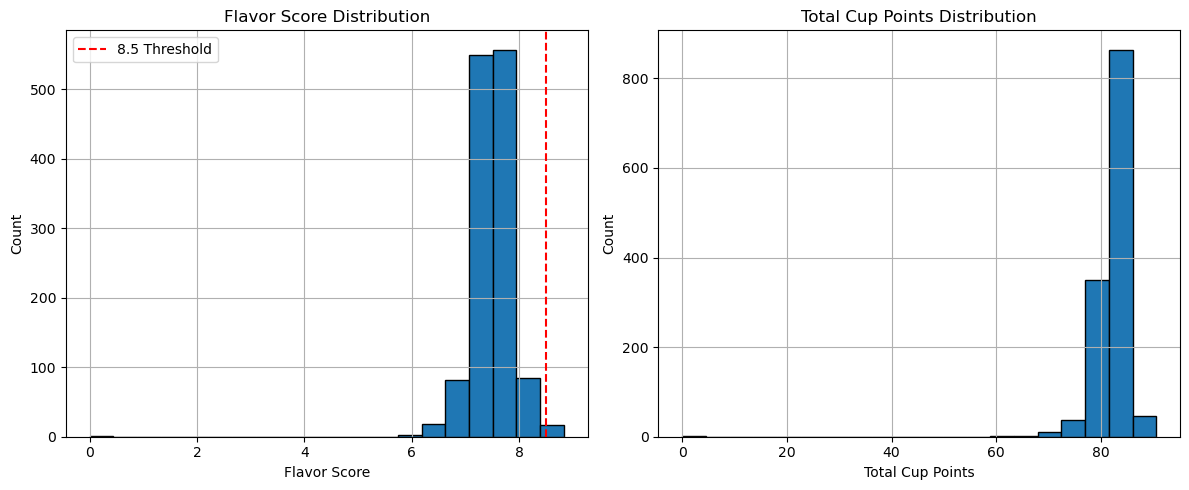

In [49]:
# Scatterplot of variables to analyze
plt.figure(figsize=(12, 5))

# Flavor histogram
plt.subplot(1, 2, 1)
df['Flavor'].hist(bins=20, edgecolor='black')
plt.axvline(8.5, color='red', linestyle='--', label='8.5 Threshold')
plt.title('Flavor Score Distribution')
plt.xlabel('Flavor Score')
plt.ylabel('Count')
plt.legend()

# Total Cup Points histogram
plt.subplot(1, 2, 2)
df['Total_Cup_Points'].hist(bins=20, edgecolor='black')
plt.title('Total Cup Points Distribution')
plt.xlabel('Total Cup Points')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


The Flavor Score histogram shows a solid cluster between 7.5 and 8.5, with fewer coffees above the 8.5.

The Total Cup Points distribution looks fairly tight, likely between 80 and 90, with minimal extreme values.

In [56]:
df['Flavor'].mean ()

7.518274809160304

In [58]:
df['Flavor'].median ()

7.58

In [60]:
df['Flavor'].max()

8.83

In [62]:
df['Total_Cup_Points'].mean()

82.11683969465649

In [64]:
df['Total_Cup_Points'].median()

82.5

In [66]:
df['Total_Cup_Points'].max()

90.58

# 3 Visualizing Variable sfor potential analysis

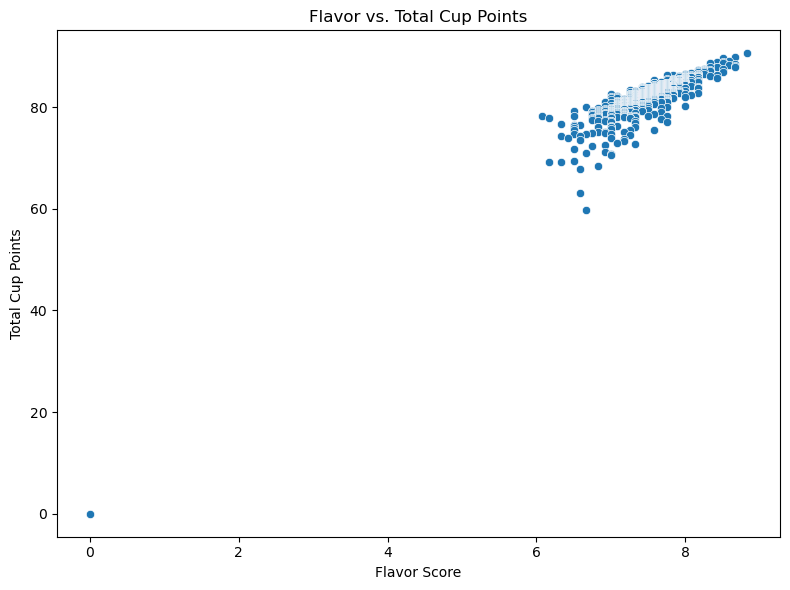

In [70]:
# Scatterplot of variables to analyze

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Flavor', y='Total_Cup_Points', data=df)
plt.title('Flavor vs. Total Cup Points')
plt.xlabel('Flavor Score')
plt.ylabel('Total Cup Points')
plt.tight_layout()
plt.show()


HYPOTHESIS: If the flavor score of a coffee exceeds 8.5, then the total cup points will increase at an accelerated rate compared to coffees with flavor scores below 8.5.

# 4 Regression Analysis


In [90]:
# Split the data into subsets for Flavor ≤ 8.0 and Flavor > 8.0
subset_low_flavor = df[df['Flavor'] <= 8.0]
subset_high_flavor = df[df['Flavor'] > 8.0]


In [92]:
print(f"Low flavor group count: {subset_low_flavor.shape[0]}")
print(f"High flavor group count: {subset_high_flavor.shape[0]}")


Low flavor group count: 1250
High flavor group count: 60


In [94]:
# convert the variables into arrays
# For Flavor ≤ 8.0
X_low = subset_low_flavor[['Flavor']].values.reshape(-1, 1)
y_low = subset_low_flavor['Total_Cup_Points'].values.reshape(-1, 1)

# For Flavor > 8.0
X_high = subset_high_flavor[['Flavor']].values.reshape(-1, 1)
y_high = subset_high_flavor['Total_Cup_Points'].values.reshape(-1, 1)


In [96]:
# convert the data into training and test sets
# For Flavor ≤ 8.0
X_low_train, X_low_test, y_low_train, y_low_test = train_test_split(
    X_low, y_low, test_size=0.3, random_state=0
)

# For Flavor > 8.0
X_high_train, X_high_test, y_high_train, y_high_test = train_test_split(
    X_high, y_high, test_size=0.3, random_state=0
)

In [98]:
# create and fit the models
# For Flavor ≤ 8.0
reg_low = LinearRegression()
reg_low.fit(X_low_train, y_low_train)

# For Flavor > 8.0
reg_high = LinearRegression()
reg_high.fit(X_high_train, y_high_train)


LinearRegression()

In [100]:
# Predict the values of y using x
# Predict for Flavor ≤ 8.0
y_low_predicted = reg_low.predict(X_low_test)

# Predict for Flavor > 8.0
y_high_predicted = reg_high.predict(X_high_test)


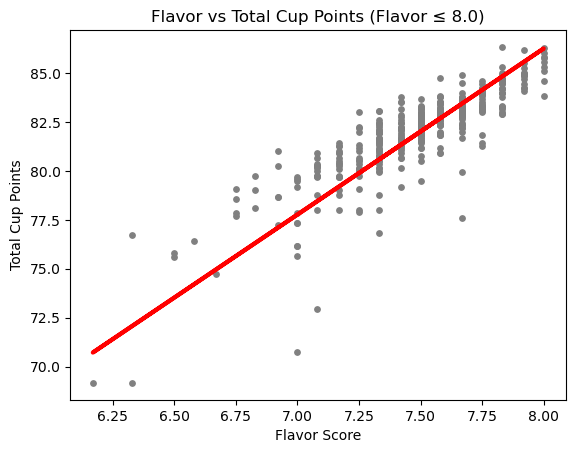

In [104]:
# create the plot for low flavor  ≤ 8.0
 # Low flavor group: Flavor ≤ 8.0
plot_low_flavor_test = plt
plot_low_flavor_test.scatter(X_low_test, y_low_test, color='gray', s=15)
plot_low_flavor_test.plot(X_low_test, y_low_predicted, color='red', linewidth=3)

plot_low_flavor_test.title('Flavor vs Total Cup Points (Flavor ≤ 8.0)')
plot_low_flavor_test.xlabel('Flavor Score')
plot_low_flavor_test.ylabel('Total Cup Points')
plot_low_flavor_test.show()


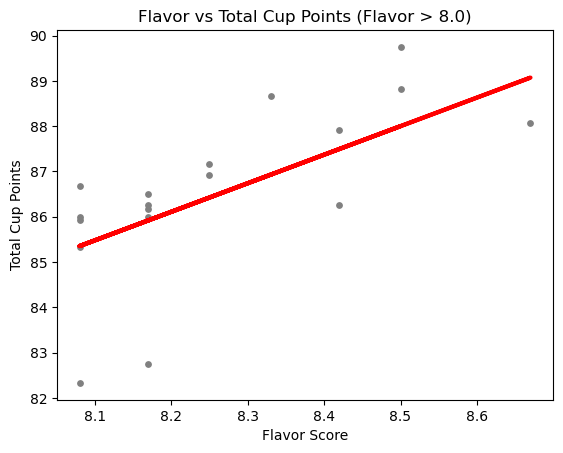

In [106]:
# Create the plot for high flavor  > 8.0
plot_high_flavor_test = plt
plot_high_flavor_test.scatter(X_high_test, y_high_test, color='gray', s=15)
plot_high_flavor_test.plot(X_high_test, y_high_predicted, color='red', linewidth=3)

plot_high_flavor_test.title('Flavor vs Total Cup Points (Flavor > 8.0)')
plot_high_flavor_test.xlabel('Flavor Score')
plot_high_flavor_test.ylabel('Total Cup Points')
plot_high_flavor_test.show()

Insight: 
- Both subsets show a positive relationship between flavor and total cup points. AS flavors improves, cup scores tend to rise but no always with the same intensity.
- For Flavors ≤ 8.0, the relationship between flavor and total score is more linear and predictable.
- Once flavor is already high, increses in cup score become less predictable based on flavor alone.
- Is easir to predict Cup score witn more confidence based on flavor when its 8.0 or below. 

In [116]:
# Model summary for low flavor coffe (flavor <= 8.0)

# Calculate mean squared error
mse_low = mean_squared_error(y_low_test, y_low_predicted)

# Root mean squared error (same unit as Total_Cup_Points)
rmse_low = np.sqrt(mse_low)

# R² score
r2_low = r2_score(y_low_test, y_low_predicted)

# Print model summary stats
print('Model Summary Statistics for Flavor ≤ 8.0')
print('Slope:', reg_low.coef_)  
print('Root mean squared error:', rmse_low)
print('R2 score:', r2_low)


Model Summary Statistics for Flavor ≤ 8.0
Slope: [[8.48696372]]
Root mean squared error: 1.3286490645541236
R2 score: 0.671817855626226


In [118]:
# Model summary for high flavor coffe >8.0

# Calculate mean squared error
mse_high = mean_squared_error(y_high_test, y_high_predicted)

# Root mean squared error (same unit as Total_Cup_Points)
rmse_high = np.sqrt(mse_high)

# R² score
r2_high = r2_score(y_high_test, y_high_predicted)

# Print model summary stats
print('Model Summary Statistics for Flavor > 8.0')
print('Slope:', reg_high.coef_)  
print('Root mean squared error:', rmse_high)
print('R2 score:', r2_high)


Model Summary Statistics for Flavor > 8.0
Slope: [[6.30575319]]
Root mean squared error: 1.3431973672779651
R2 score: 0.456422000833159


In [120]:
#Manual check for flavor <= 8.0
data_low_flavor = pd.DataFrame({
    'Actual_Total_Cup_Points': y_low_test.flatten(),
    'Predicted_Total_Cup_Points': y_low_predicted.flatten()
})

# Show the first 25 predictions
data_low_flavor.head(25)



,Actual_Total_Cup_Points,Predicted_Total_Cup_Points
0,82.17,79.886601
1,81.33,80.565558
2,84.00,84.130083
3,81.50,81.329385
4,85.50,85.572867
5,78.67,77.085903
6,84.00,84.130083
7,84.08,85.572867
8,81.67,81.329385
9,80.08,79.886601


In [128]:
# Manual check for flavor >8.0
data_high_flavor = pd.DataFrame({
    'Actual_Total_Cup_Points': y_high_test.flatten(),
    'Predicted_Total_Cup_Points': y_high_predicted.flatten()
})

# Display 
data_high_flavor.head(20)


,Actual_Total_Cup_Points,Predicted_Total_Cup_Points
0,86.92,86.424198
1,86.17,85.919738
2,82.33,85.352220
3,86.67,85.352220
4,87.92,87.496176
5,89.75,88.000637
6,86.25,87.496176
7,82.75,85.919738
8,86.00,85.919738
9,87.17,86.424198


For Flavor <= 8.0
Slope: For evey one point increase in flavor score, Total cup points increase by aproximately 8.49 points on average within that range
R² Score: 67% of the variation in Total Cup Points can be explainend just by knowing the Flavor score.
RMSE: ON average, the predicted cup scores are about 1.33 points off from the real values.

For Flavor > 8.0
Slope: For every one point increase in flavor score, the model predicts an average increase of 6.31 points in the total cup score.
R² Score: 45.6% of the variation in Total Cup Points can be explained just by knowing the the flavor score.
RMSE: On average, the predicted cup scores are about 1.34 points off from the rel values


Summary:
Based on the regression analysis, we can conclude that flavor is a meaningful predictor of total cup score, but its influence varies depending on the flavor range. For coffees with flavor scores <= 8.0, the model showed a stronger and more consistent relationship indicated by a higher slope 8.49, better fit R² = 0.67, and slightly lower prediction error 1.33. 

Potential Bias:
- The  models for both groups appear to have relatively low prediction bias based on similar RMSEs and no obvious residual trends. However, the lower R² and flatter slope in the high-flavor model suggest modeling bias, flavor alone isn’t enough to explain cup score in that context.
- The model may not generalize to lower quality oor non specialty grade coffees.
- Many review are from coffees grown in Latian America and East frica, where specialty coffee production is strong
- The variance in judgment could introduce measurement noise or influence regression outcomes at higher scores.